In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import const as CONST
from SeqDataset import SeqDataset, TransformedDataset
from sklearn.preprocessing import RobustScaler
from utils import read_csv_ts, robust_pct
import numpy as np
from darts import TimeSeries
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [2]:
sanity_check = False
dataset = SeqDataset.load(sanity_check=sanity_check)
dataset_pct = SeqDataset.load(sanity_check=sanity_check, use_pct=True)


INFO:Dataset:Loading full data, assuming length from AEM.csv
INFO:Dataset:Loading AEM timeseries
INFO:Dataset:Loaded 1/5 of timeseries
INFO:Dataset:Loading AUY timeseries
INFO:Dataset:Loaded 2/5 of timeseries
INFO:Dataset:Loading HMY timeseries
INFO:Dataset:Loaded 3/5 of timeseries
INFO:Dataset:Loading KGC timeseries
INFO:Dataset:Loaded 4/5 of timeseries
INFO:Dataset:Loading NEM timeseries
INFO:Dataset:Loaded 5/5 of timeseries
INFO:Dataset:Loading full data, assuming length from AEM.csv
INFO:Dataset:Loading AEM timeseries
INFO:Dataset:Loaded 1/5 of timeseries
INFO:Dataset:Loading AUY timeseries
INFO:Dataset:Loaded 2/5 of timeseries
INFO:Dataset:Loading HMY timeseries
INFO:Dataset:Loaded 3/5 of timeseries
INFO:Dataset:Loading KGC timeseries
INFO:Dataset:Loaded 4/5 of timeseries
INFO:Dataset:Loading NEM timeseries
INFO:Dataset:Loaded 5/5 of timeseries


['AEM', 'AUY', 'HMY', 'KGC', 'NEM']


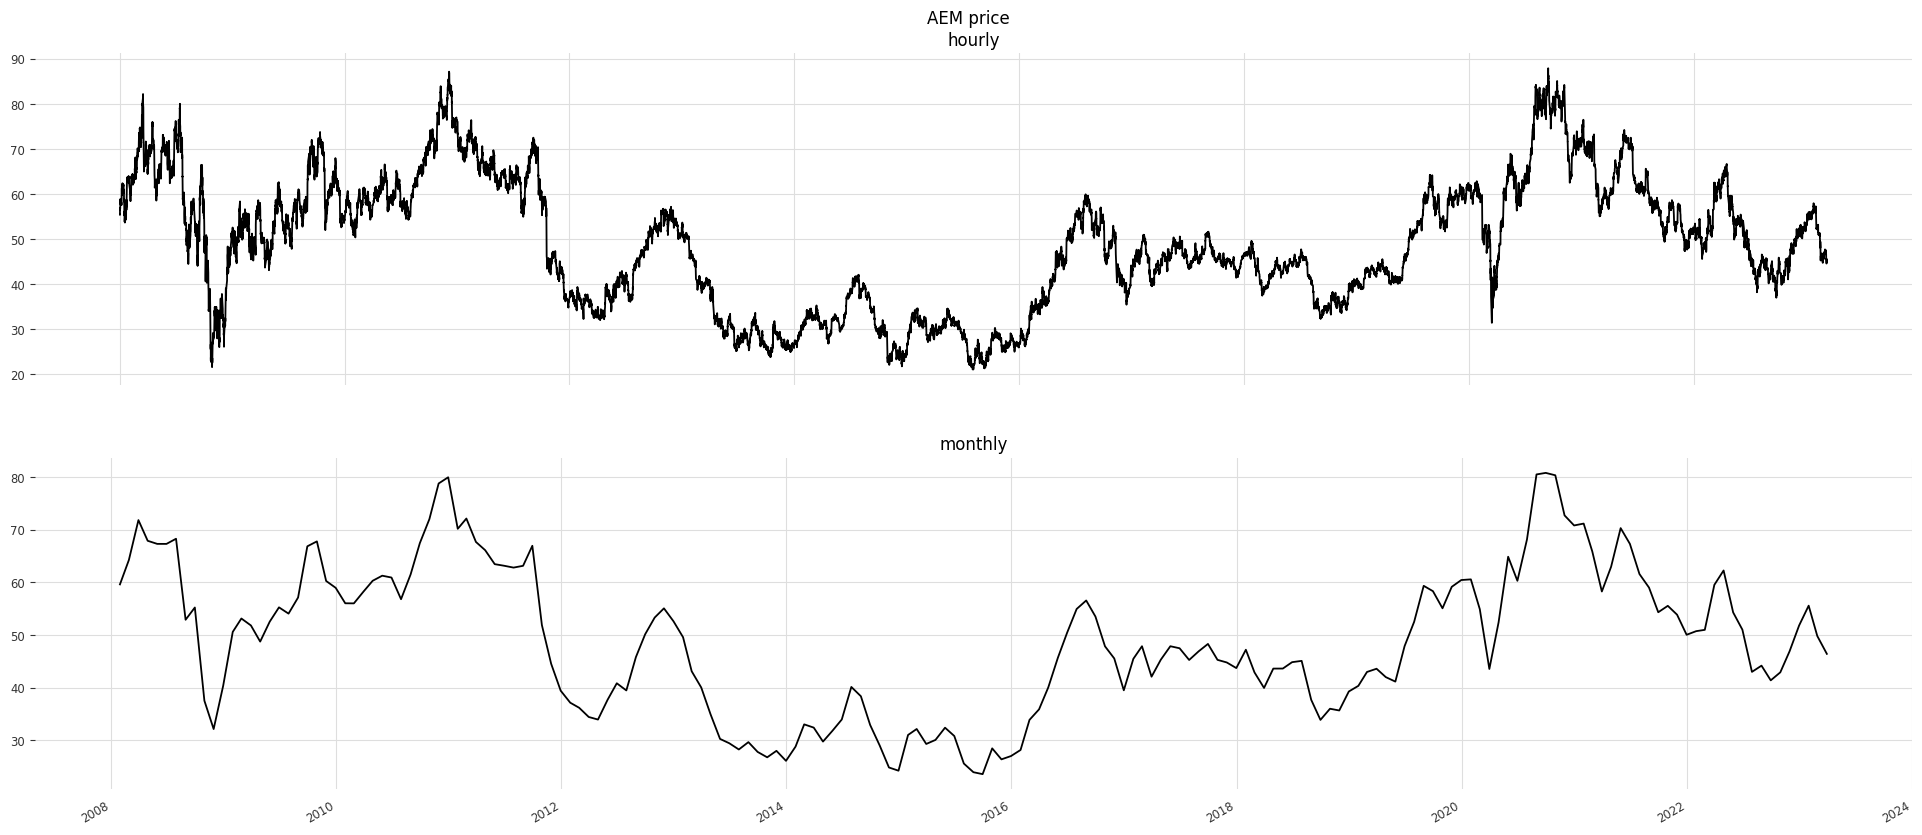

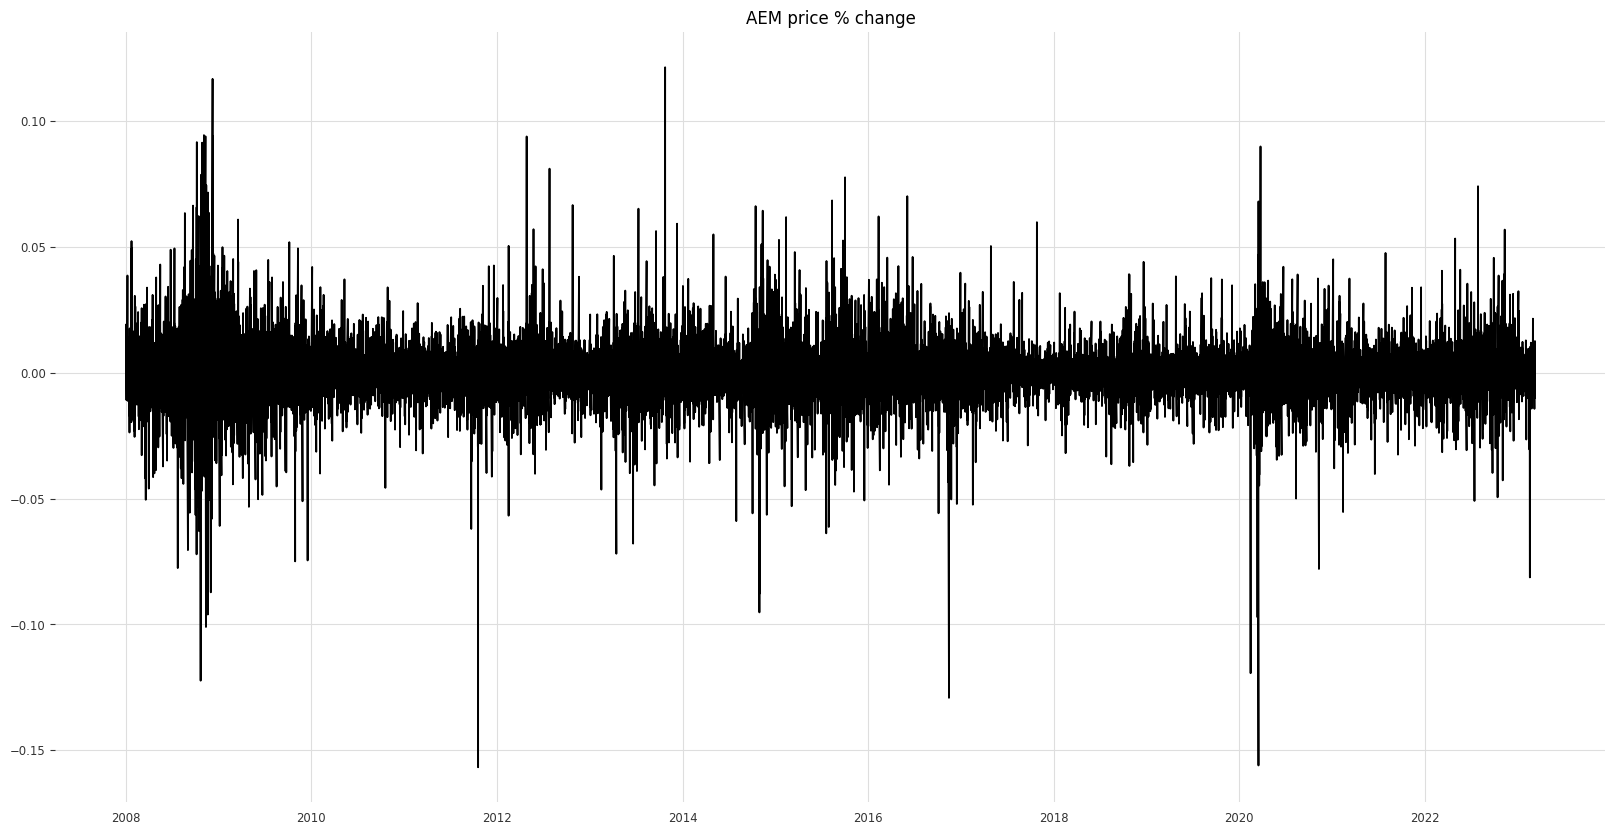

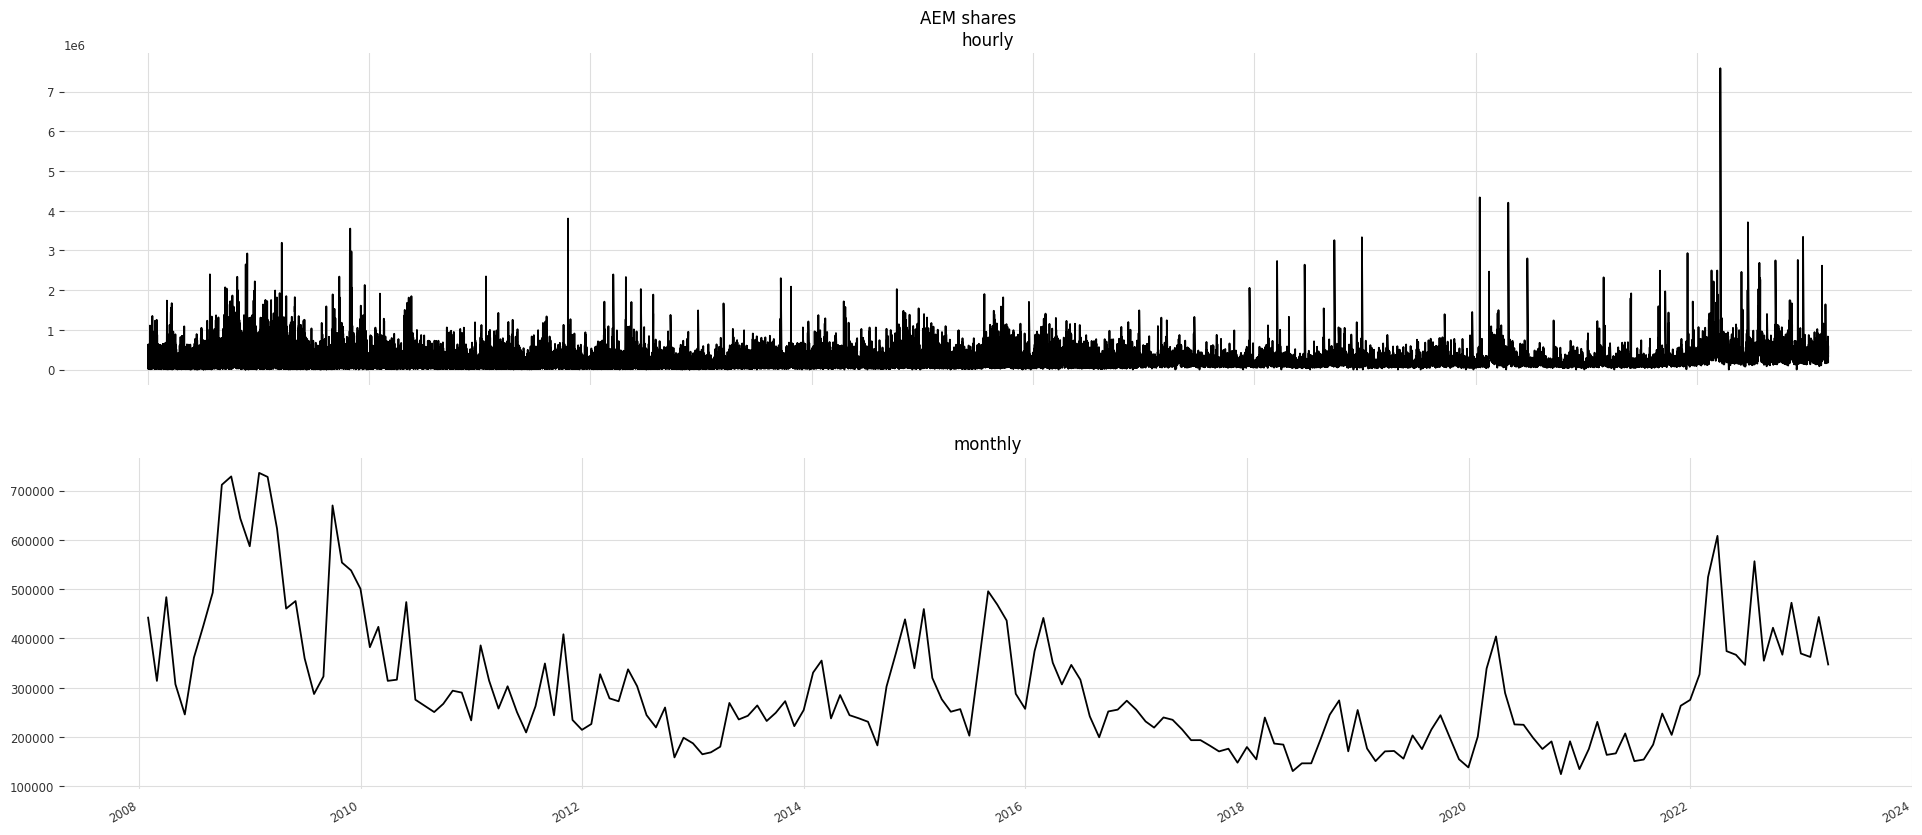

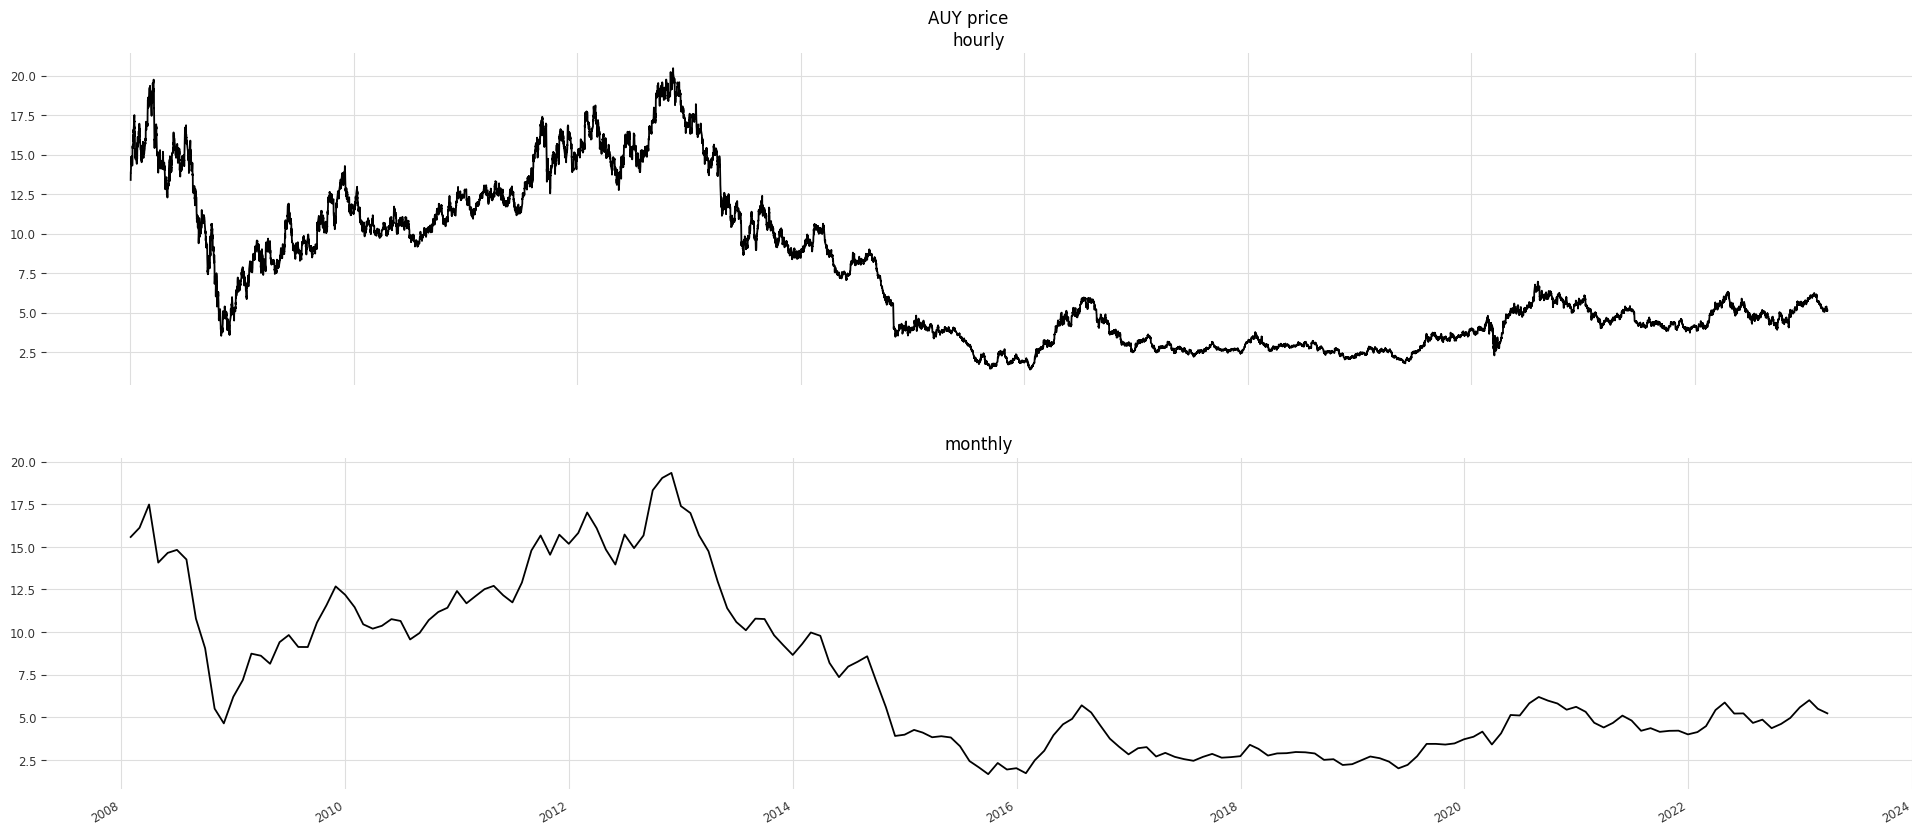

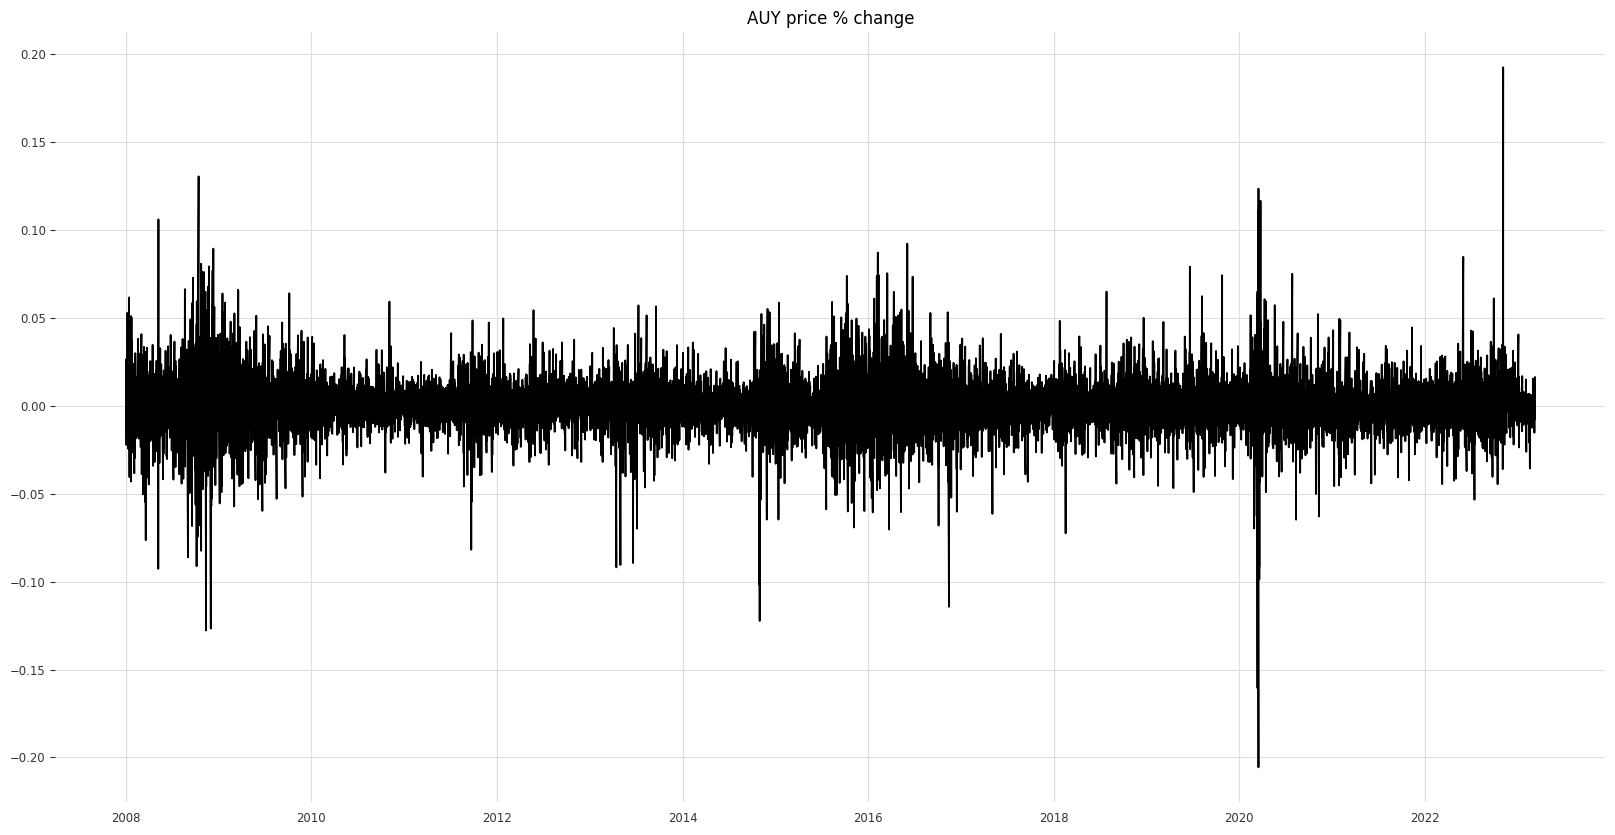

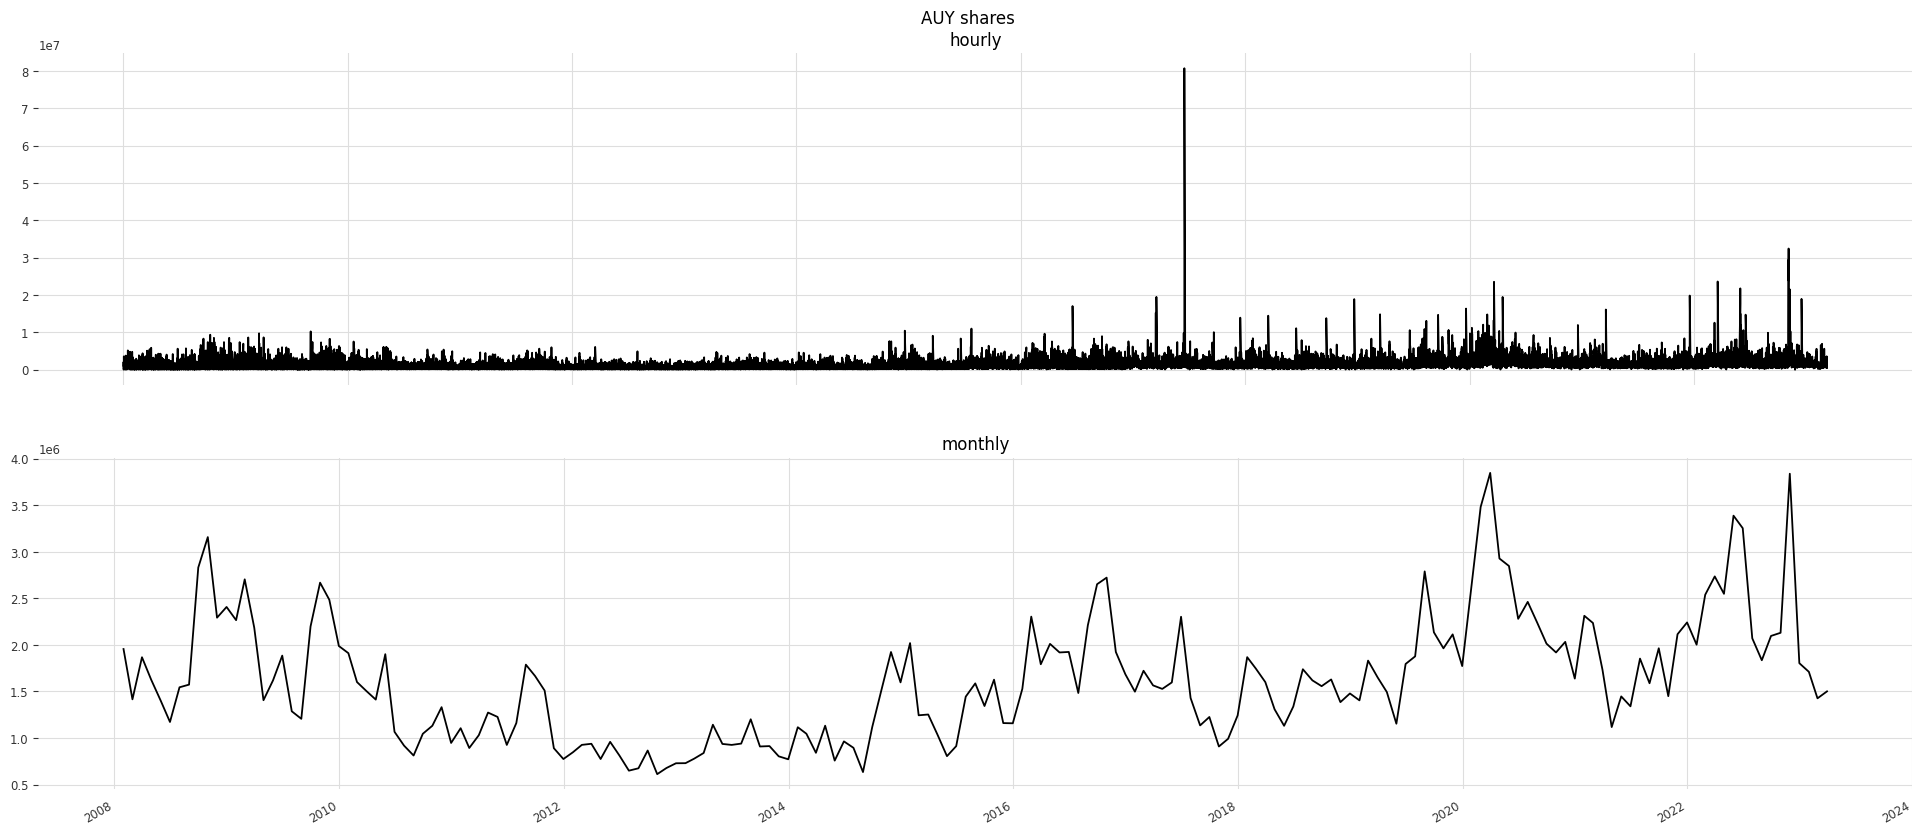

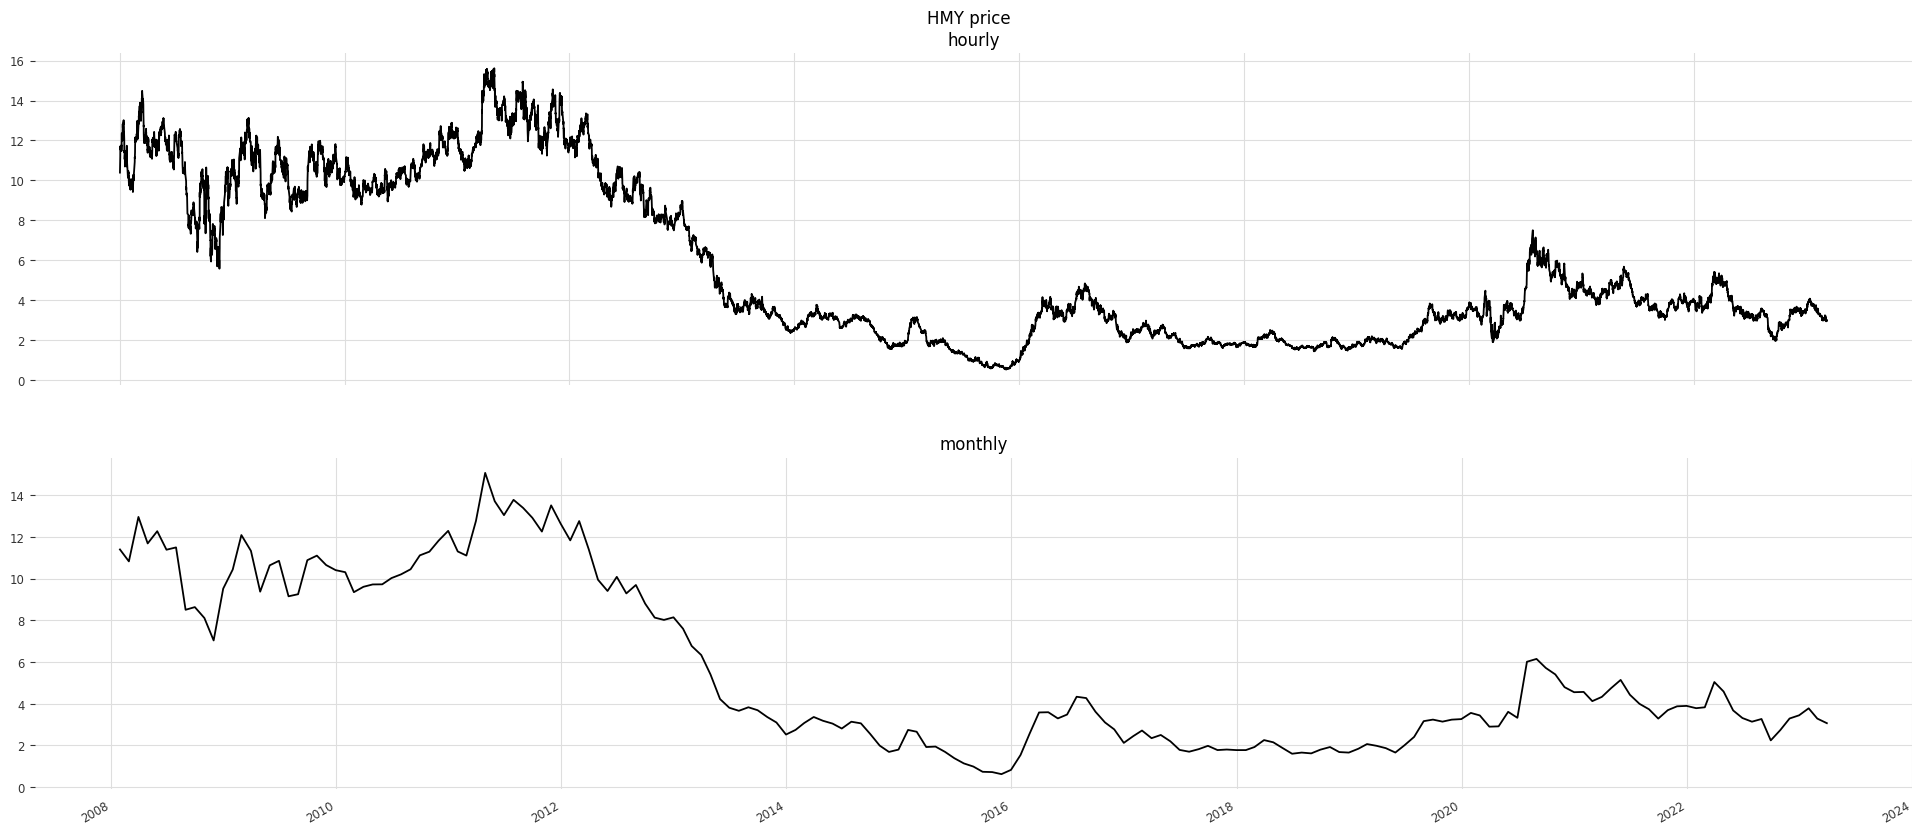

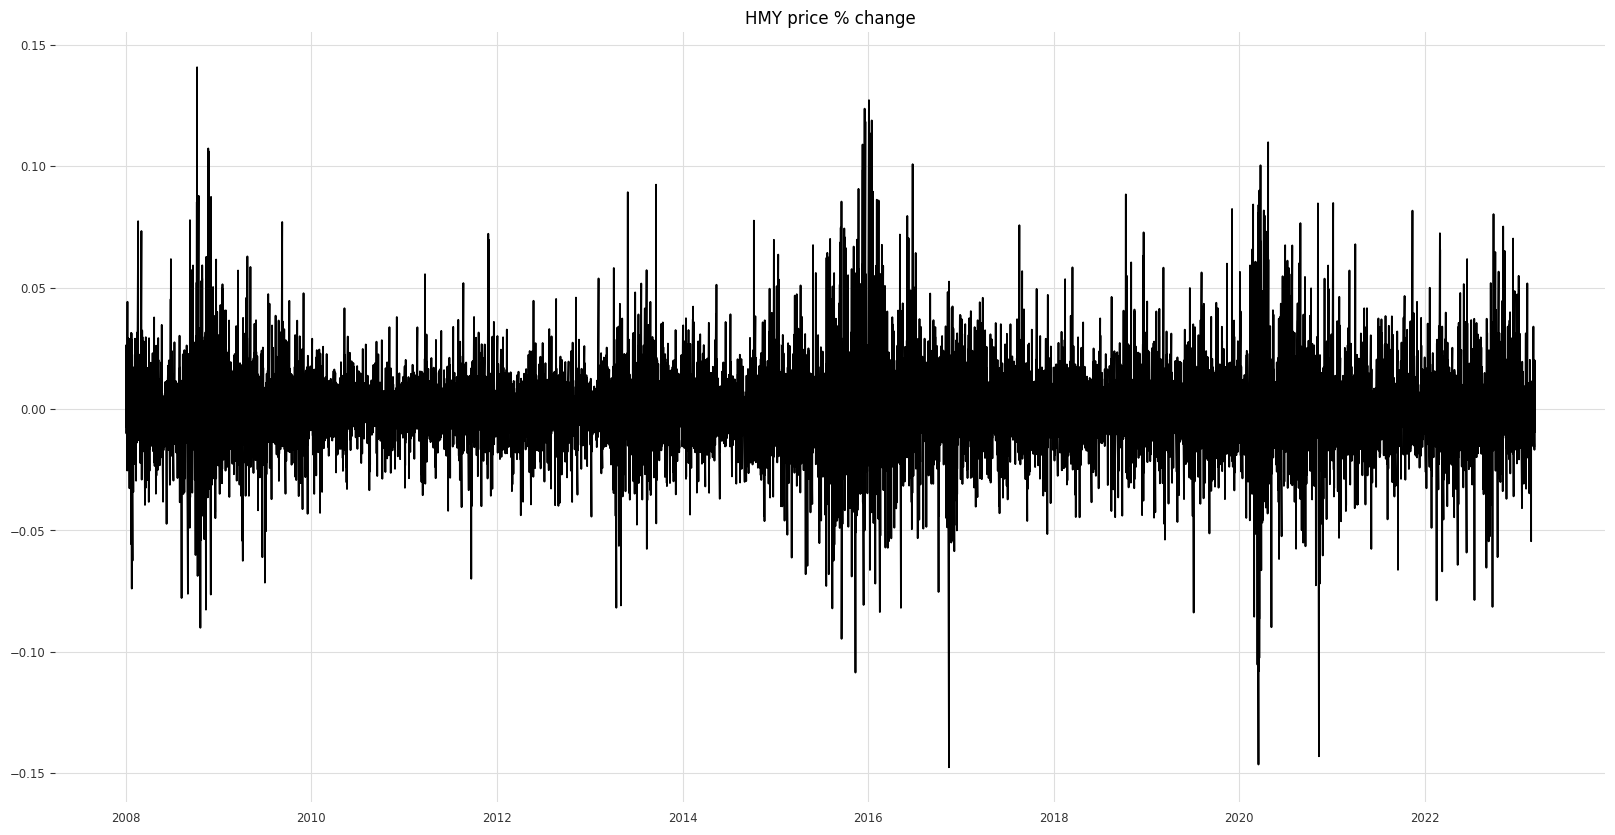

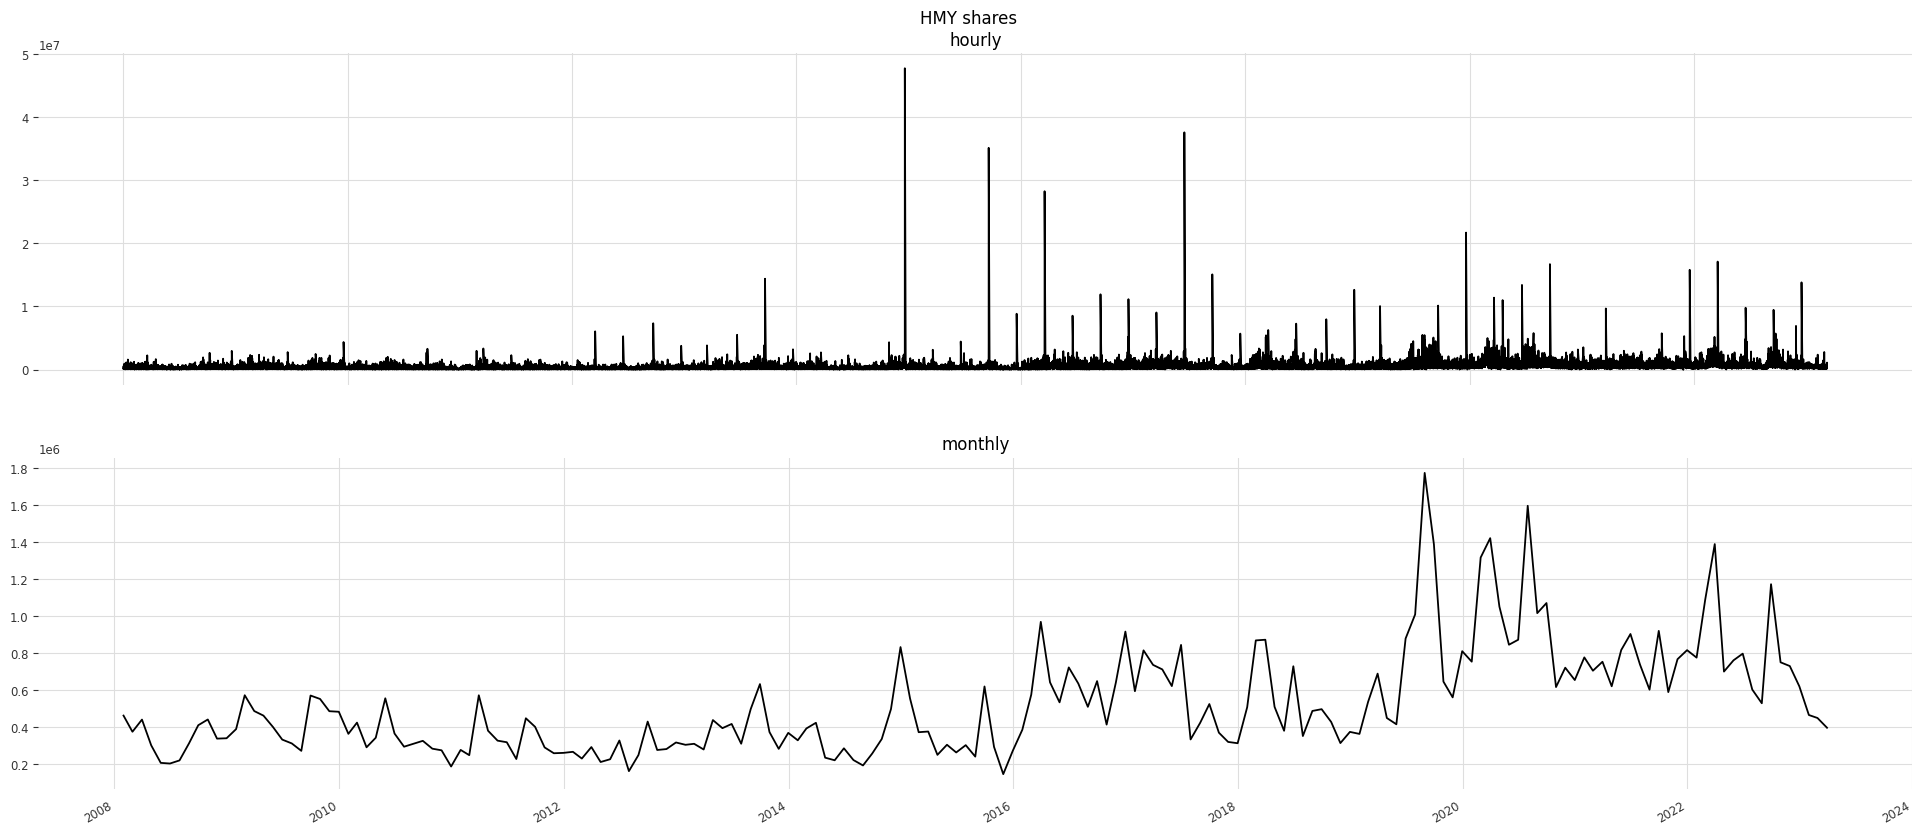

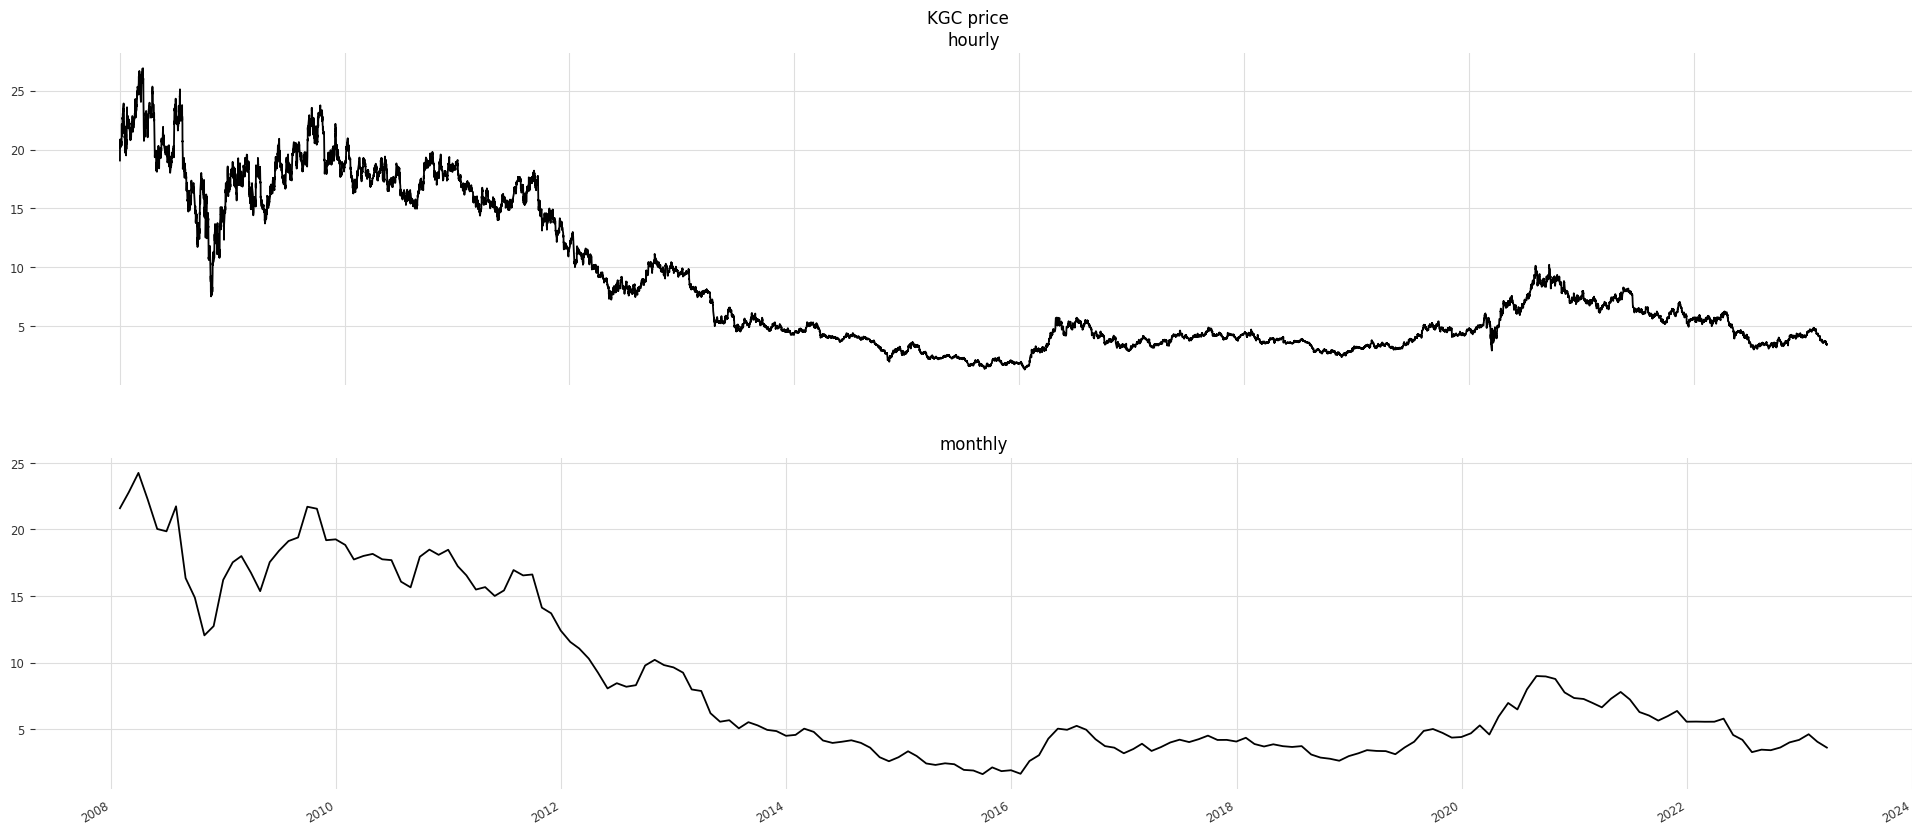

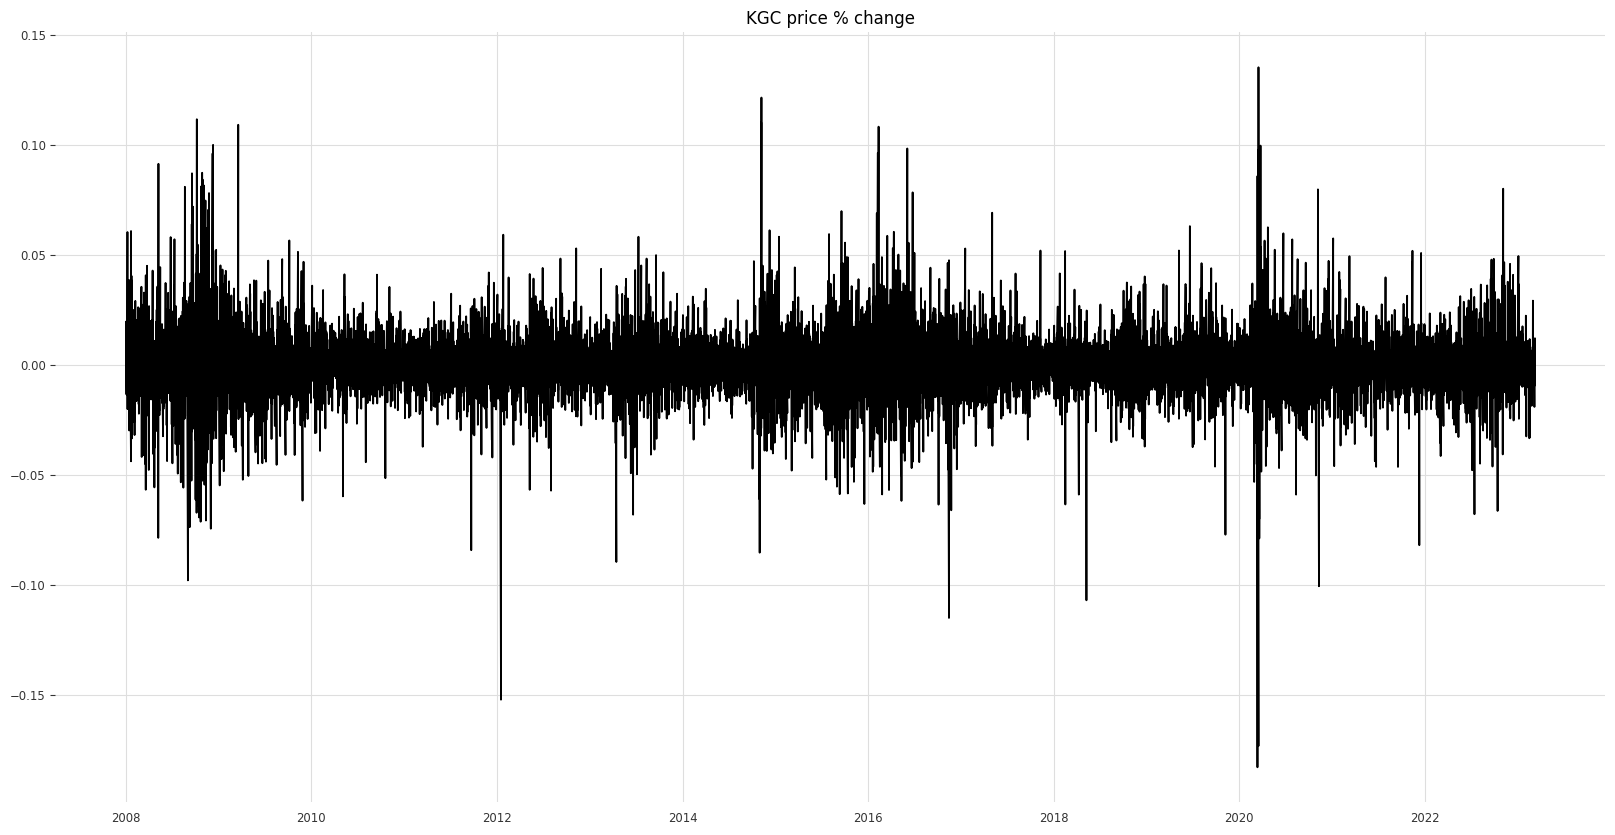

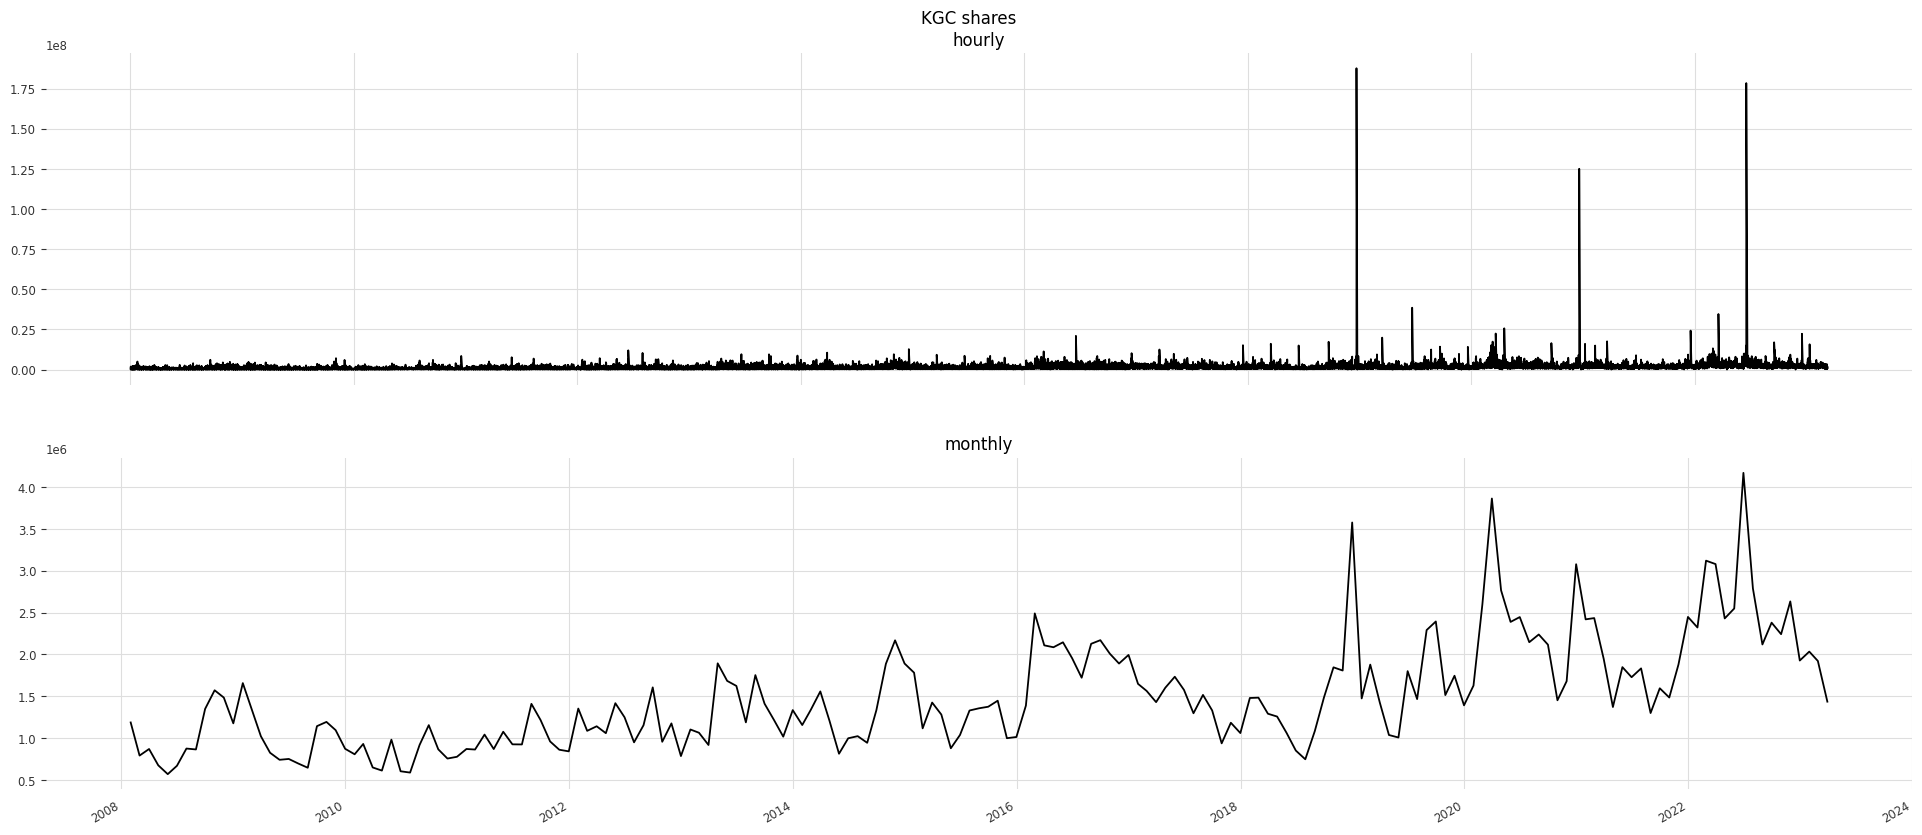

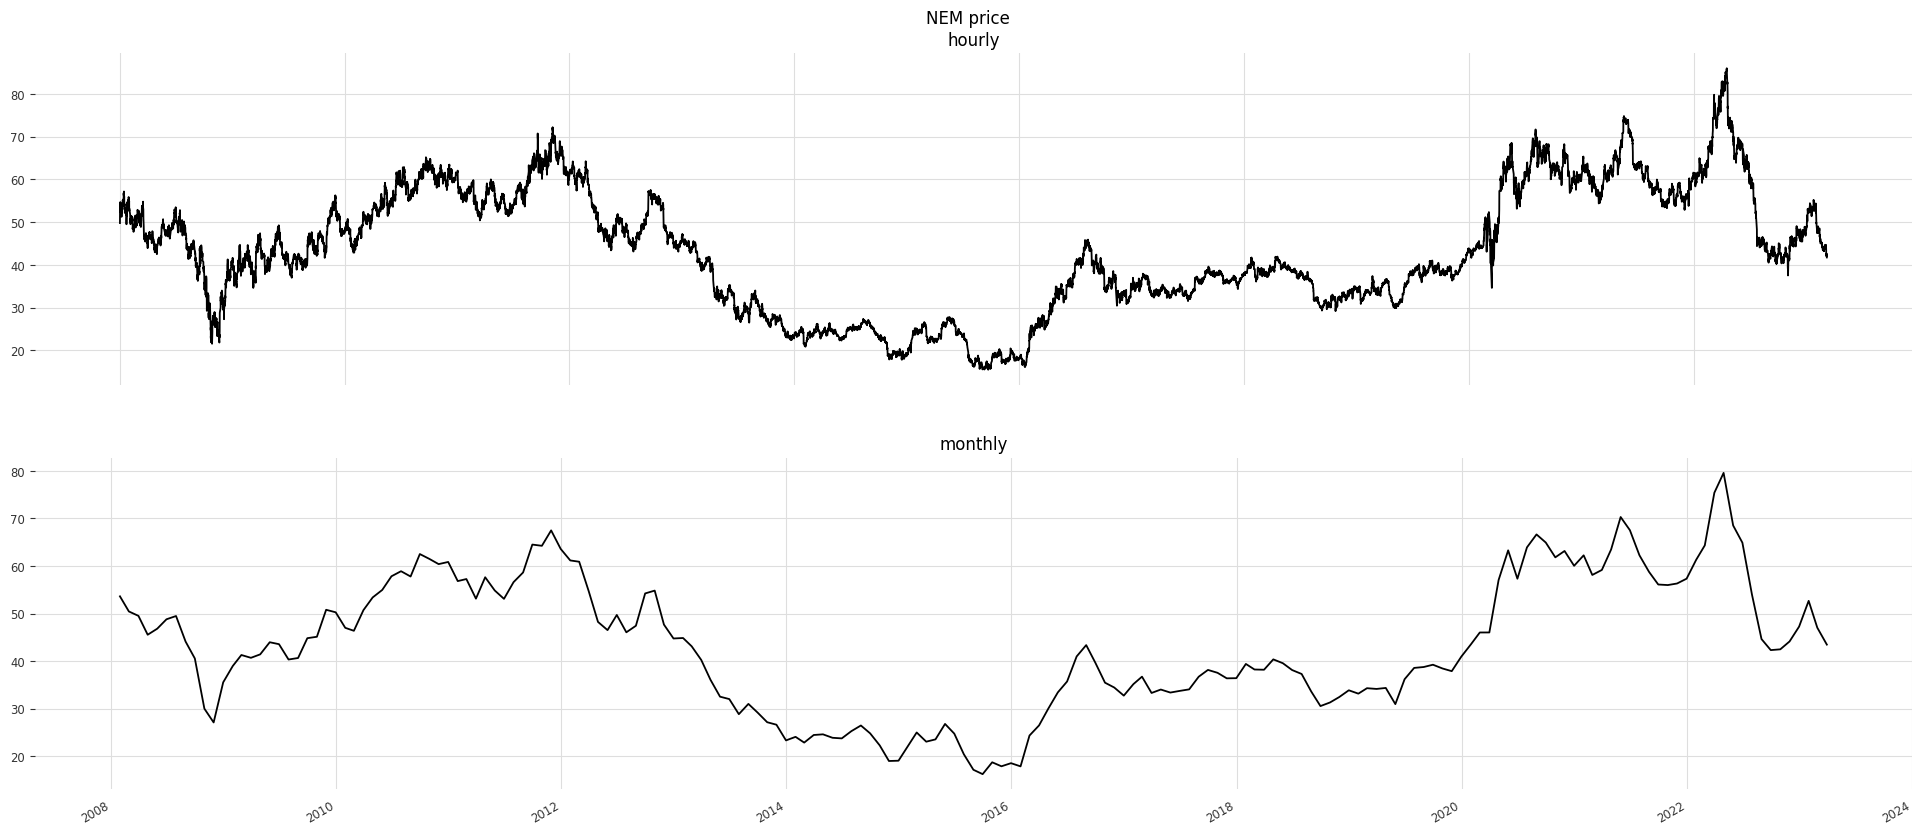

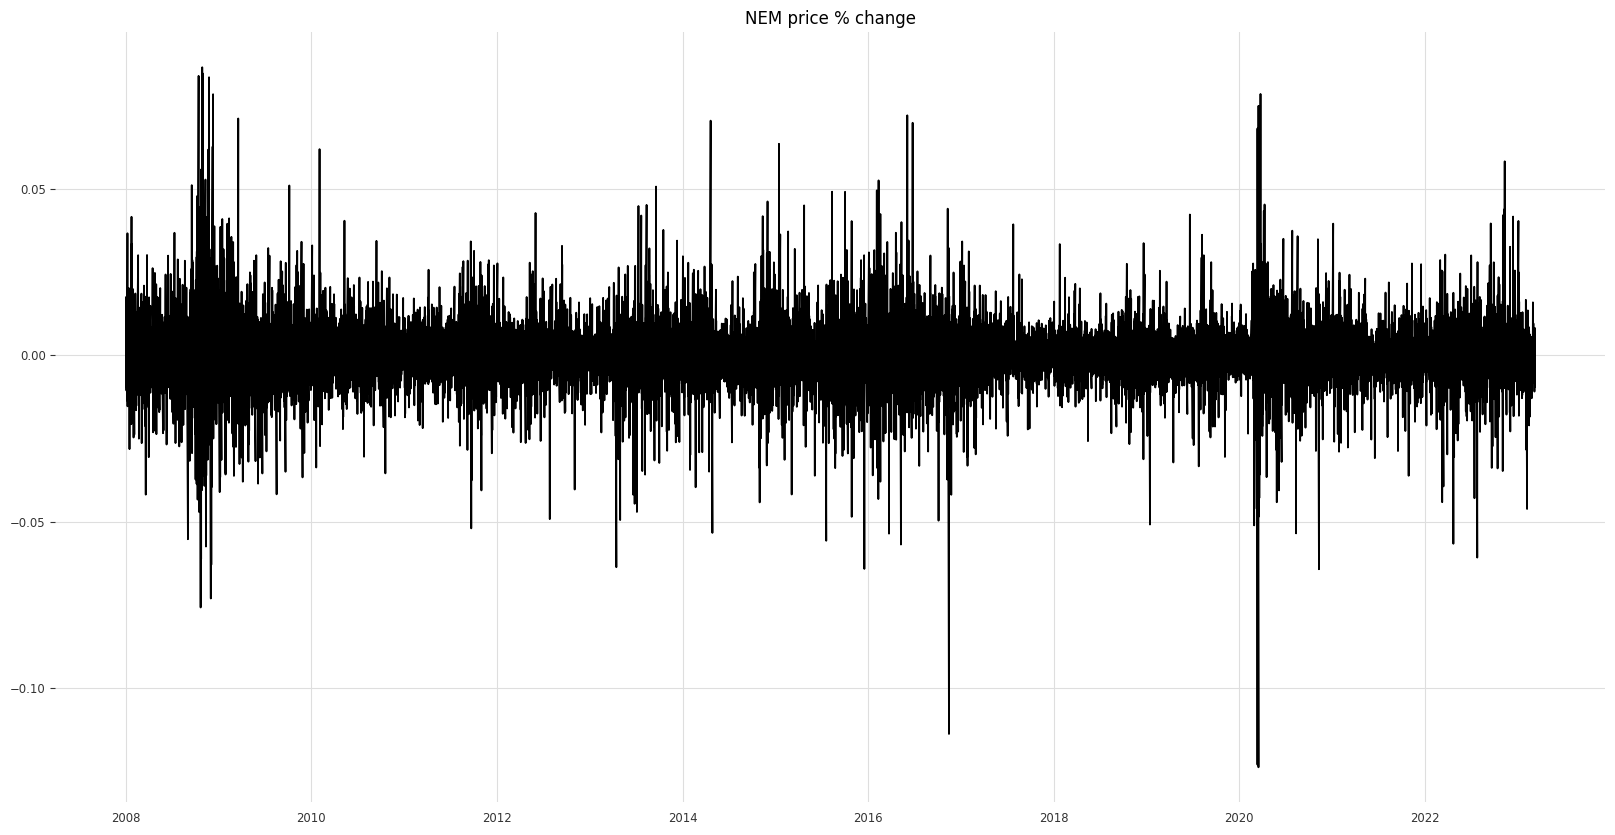

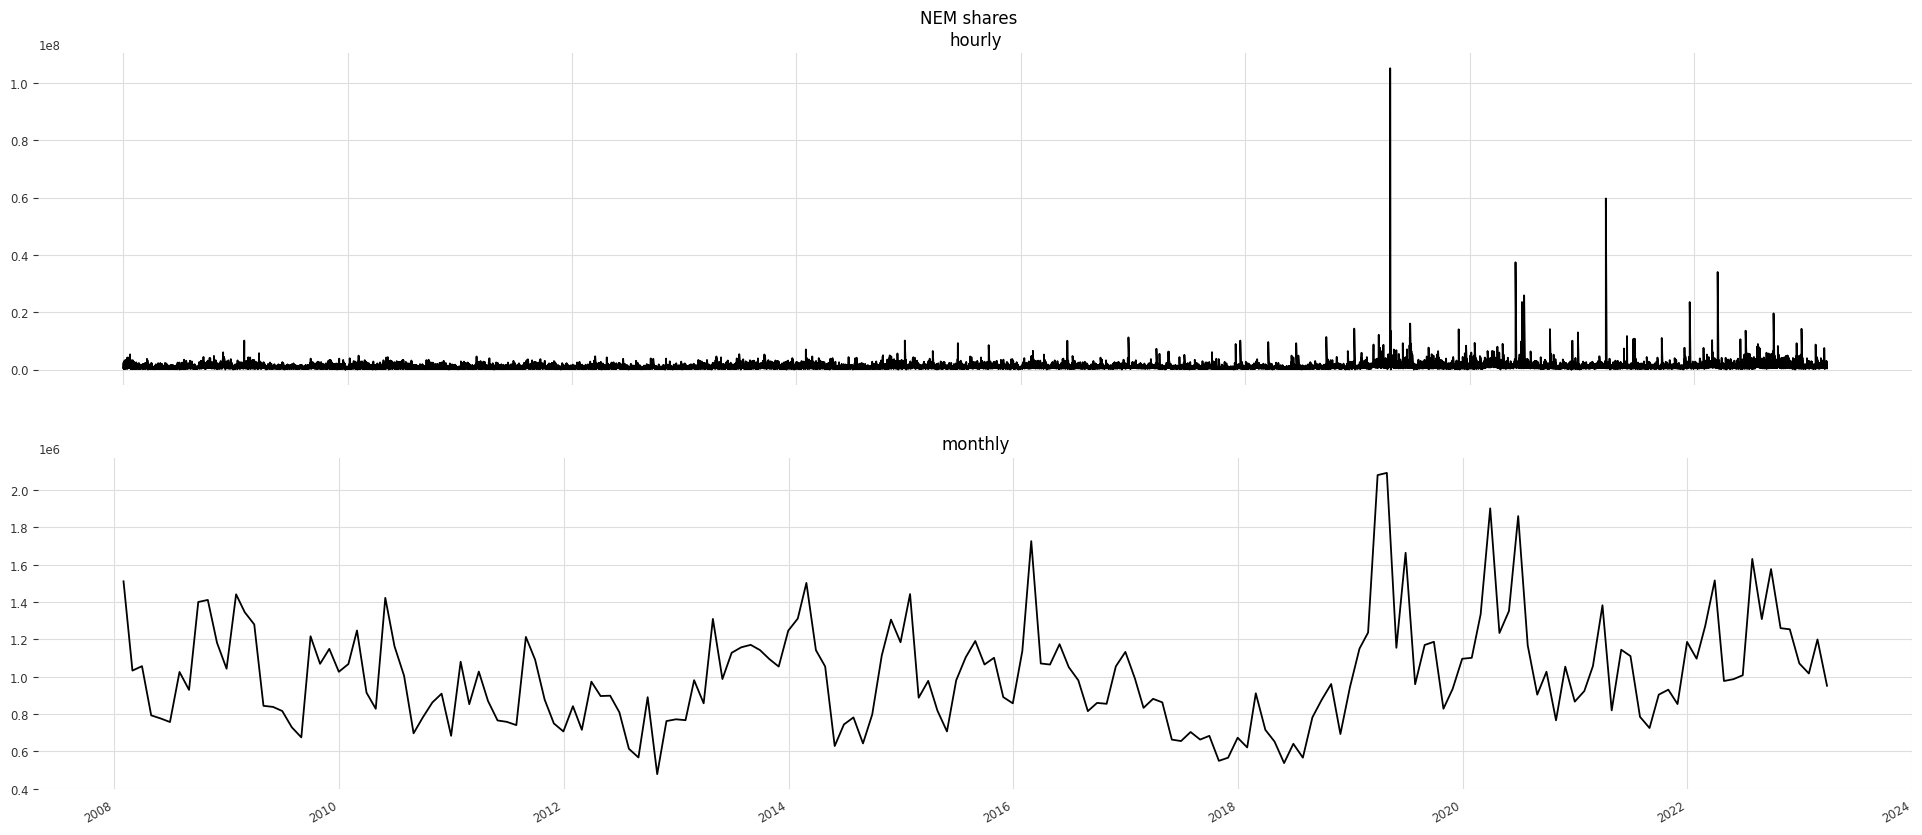

In [3]:
def present_series(title, timeseries):
    figure, axis = plt.subplots(2,1)
    figure.tight_layout(pad=3)
    axis[0].plot(timeseries)
    axis[0].set_title(f"hourly")
    monthly_df = timeseries.resample("M").mean()
    axis[1].plot(monthly_df)
    axis[1].set_title(f"monthly")
    figure.tight_layout(pad=3)
    figure.suptitle(f"{title}", fontsize=12)
    figure.autofmt_xdate()


print(dataset.used_tickers)

for idx,ticker in enumerate(dataset.used_tickers):
    present_series(f"{ticker} {CONST.FEATURES.PRICE}", dataset.series[idx][CONST.FEATURES.PRICE].pd_series())

    fig = plt.figure(f"{idx} {ticker} % change")
    plt.plot(dataset_pct.series[idx][CONST.FEATURES.PRICE].pd_series())
    plt.title(f"{ticker} {CONST.FEATURES.PRICE} % change")
   
    present_series(f"{ticker} {CONST.FEATURES.SHARES}", dataset.series[idx][CONST.FEATURES.SHARES].pd_series())

plt.show()

In [4]:
transformed = TransformedDataset.build_from_dataset(dataset_pct)

INFO:Dataset:Transforming 5 timeseries


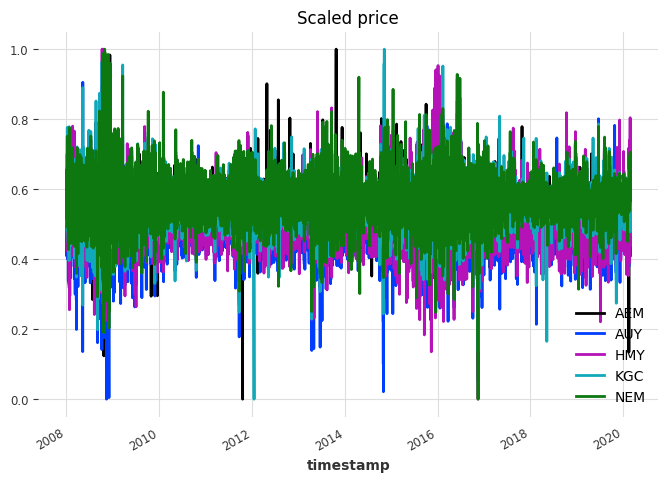

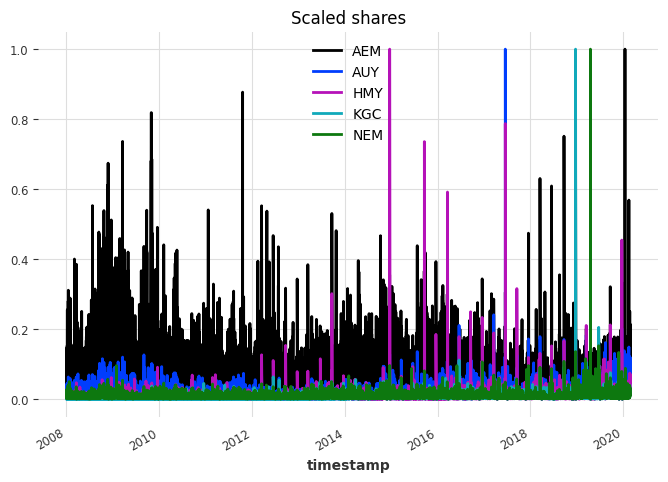

In [5]:
def present_scaled_feature(feature_name):
    plt.figure(figsize=(8, 5))
    for idx,timeseries in enumerate(transformed.series):
        timeseries[feature_name].plot(label=dataset.used_tickers[idx])
    plt.title(f"Scaled {feature_name}")
    plt.legend()
    plt.show()


present_scaled_feature(CONST.FEATURES.PRICE)
present_scaled_feature(CONST.FEATURES.SHARES)

In [6]:
import darts.utils.statistics as statistics
# Stationary 
stats_df = pd.DataFrame({ CONST.FEATURES.PRICE: [], CONST.FEATURES.SHARES: []})
for idx,timeseries in enumerate(transformed.series):
    ticker = dataset.used_tickers[idx]
    price_stationarity = statistics.stationarity_tests(timeseries[CONST.FEATURES.PRICE])
    shares_stationarity = statistics.stationarity_tests(timeseries[CONST.FEATURES.SHARES])
    stats_df.loc[ticker] = [price_stationarity,shares_stationarity]

print(stats_df)

c:\repos\nasdaq_forecasting\.venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\repos\nasdaq_forecasting\.venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
c:\repos\nasdaq_forecasting\.venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\repos\nasdaq_forecasting\.venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-u

     price  shares
AEM   True   False
AUY   True   False
HMY   True   False
KGC   True   False
NEM   True    True


In [7]:
from darts import TimeSeries
import numpy as np

sns.set_style("whitegrid")
stocks_dict = {}
for ticker in CONST.TICKERS:
    csv_path = f"{CONST.PATHS.MERGED}/{ticker}.csv"
    pd_series = read_csv_ts(csv_path)[CONST.FEATURES.PRICE]
    series = TimeSeries.from_series(pd_series)
    series = series.astype(np.float32)
    train, _ = series.split_before(len(series * 0.8))
    stocks_dict[ticker] = train.pd_series()

stocks_df = pd.DataFrame(stocks_dict)
stocks_df = robust_pct(stocks_df)
plt.figure("Stocks corr")
sns.heatmap(stocks_df.corr(), annot=True, cmap="summer")
plt.show()

ERROR:darts.timeseries:ValueError: point (int) should be a valid index in series


ValueError: point (int) should be a valid index in series